In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
train_dir="D:\\AI Project\\chest\\data\\train"
test_dir="D:\\AI Project\\chest\\data\\test"


train_datagn=ImageDataGenerator(rescale=1/255,validation_split=0.2)
test_datagn=ImageDataGenerator(rescale=1/255)


train_set=train_datagn.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
    )

valid_set=train_datagn.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

test_set=test_datagn.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 4945 images belonging to 9 classes.
Found 1232 images belonging to 9 classes.
Found 566 images belonging to 9 classes.


In [20]:
train_set.class_indices

{'Air Embolism Conditions': 0,
 'Chronic Obstructive Pulmonary': 1,
 'Encapsulated Lesions': 2,
 'Mediastinal Disorders': 3,
 'Normal Anatomy': 4,
 'Pleural Pathologies': 5,
 'Pneumonia': 6,
 'Pulmonary Fibrotic': 7,
 'Thoracic Abnormalities': 8}

In [21]:
labels=['Air Embolism Conditions','Chronic Obstructive Pulmonary','Encapsulated Lesions','Mediastinal Disorders','Normal Anatomy','Pleural Pathologies'
        ,'Pneumonia','Pulmonary Fibrotic','Thoracic Abnormalities']
print(labels)

['Air Embolism Conditions', 'Chronic Obstructive Pulmonary', 'Encapsulated Lesions', 'Mediastinal Disorders', 'Normal Anatomy', 'Pleural Pathologies', 'Pneumonia', 'Pulmonary Fibrotic', 'Thoracic Abnormalities']


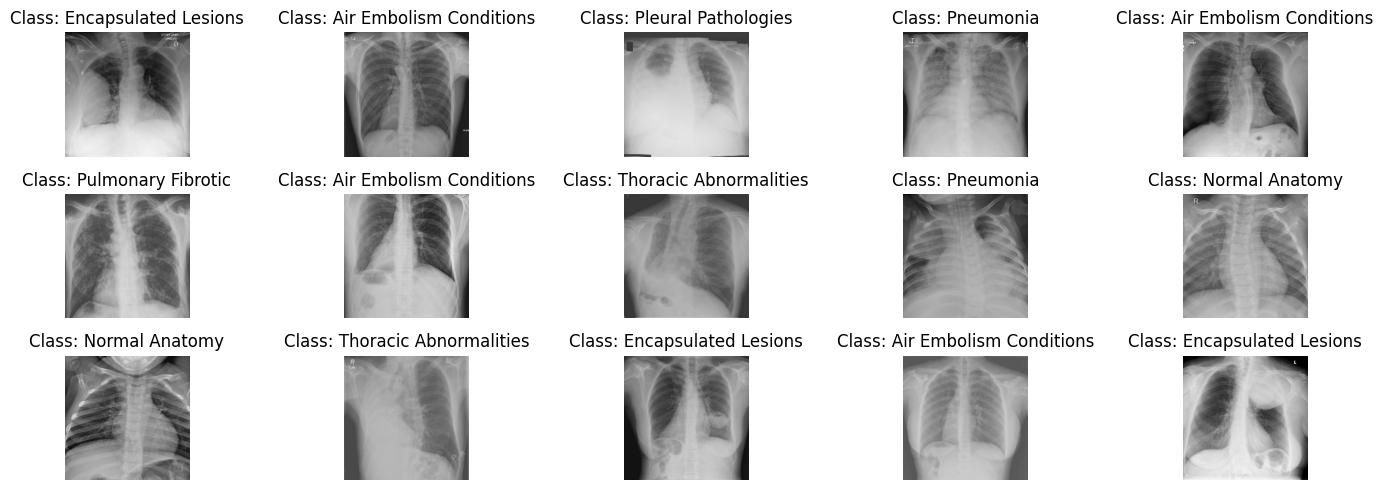

In [22]:
plt.figure(figsize=(15, 5))

for i in range(15):  
    plt.subplot(3, 5, i+1) 
    image, label = train_set.next()  
    plt.imshow(image[0])  
    plt.axis("off")  
    plt.title(f"Class: {labels[np.argmax(label)]}") 

plt.tight_layout()  
plt.show()

In [23]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(28,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(500,activation="relu"))
model.add(Dropout(.5))

model.add(Dense(200,activation="relu"))
model.add(Dropout(.2))

model.add(Dense(50,activation="relu"))
model.add(Dropout(.3))

model.add(Dense(9,activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 64)       256       
 ormalization)                                                   
                                                      

In [24]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
histroy=model.fit(train_set,epochs=10,batch_size=16,validation_data=valid_set)

Epoch 1/10
155/155 [==============================] - 21s 119ms/step - loss: 1.8702 - accuracy: 0.3373 - val_loss: 2.2269 - val_accuracy: 0.1778
Epoch 2/10
155/155 [==============================] - 17s 112ms/step - loss: 1.3759 - accuracy: 0.5080 - val_loss: 2.0976 - val_accuracy: 0.2354
Epoch 3/10
155/155 [==============================] - 17s 111ms/step - loss: 1.0915 - accuracy: 0.6245 - val_loss: 2.5085 - val_accuracy: 0.2078
Epoch 4/10
155/155 [==============================] - 17s 111ms/step - loss: 0.7907 - accuracy: 0.7357 - val_loss: 1.3182 - val_accuracy: 0.5219
Epoch 5/10
155/155 [==============================] - 17s 112ms/step - loss: 0.5767 - accuracy: 0.8150 - val_loss: 1.7638 - val_accuracy: 0.4237
Epoch 6/10
155/155 [==============================] - 17s 112ms/step - loss: 0.4157 - accuracy: 0.8679 - val_loss: 0.6683 - val_accuracy: 0.7808
Epoch 7/10
155/155 [==============================] - 17s 112ms/step - loss: 0.3239 - accuracy: 0.8965 - val_loss: 8.7789 - val_ac

In [29]:
test_loss,test_acc=model.evaluate(test_set)
print(test_acc)

18/18 [==============================] - 1s 44ms/step - loss: 0.2288 - accuracy: 0.9382
0.9381625652313232


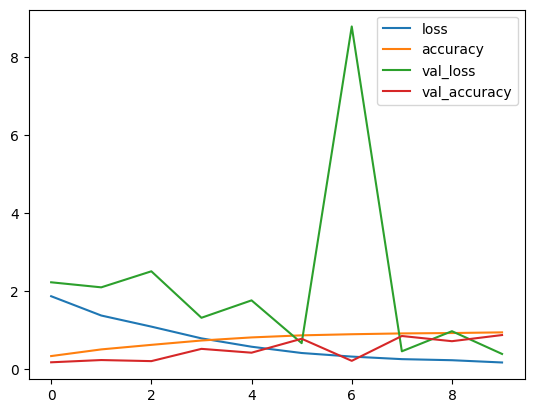

In [30]:
pd.DataFrame(histroy.history).plot()
plt.show()

In [31]:
model.save("chest.h5")